In [1]:
import os
import warnings
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px

warnings.filterwarnings("ignore")
PROJ_ROOT_PATH = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(PROJ_ROOT_PATH)
DATA_PATH = os.path.join(PROJ_ROOT_PATH, "datasets")

In [2]:
from methods.pca_approximation.PCA import get_pca_approximation, get_pca_explained_variance_ratio

Для теста буду использовать набор синтетических временных рядов вот отсюда: https://www.kaggle.com/datasets/passwordclassified/synthesised-time-series-data

In [3]:
synthesis_data = pd.read_csv(os.path.join(DATA_PATH, "Synthesised Time Series", "synthesised.csv"), index_col="id")
synthesis_data.head()

,0,1,2,3,4,5,6,7,8,9,...,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105
id,,,,,,,,,,,,,,,,,,,,,
0,25.0,25.168857,24.715599,24.277916,24.027045,23.903862,23.099880,22.619502,22.450067,22.136750,...,13.623944,13.656542,13.204566,13.414686,13.518331,13.544479,13.619775,13.679345,13.402996,13.557636
1,21.0,20.764716,19.956948,19.710582,19.301341,18.848625,18.033900,17.989180,17.485504,16.503814,...,16.071742,16.353189,16.918663,17.026205,17.213205,17.646249,17.883727,17.636658,19.453180,20.057058
2,19.0,18.912363,19.582829,19.409292,19.577184,19.987482,20.581422,21.069311,20.915548,21.400714,...,4.488784,4.241661,4.248950,4.143697,4.440768,4.395694,4.133176,4.012145,4.068881,2.916924
3,23.0,22.877990,23.433526,24.324950,24.358498,24.738647,25.654500,25.933526,26.196802,27.099793,...,24.198968,24.048091,23.835752,23.532187,23.426798,23.362099,23.446236,23.666149,21.995872,21.410275
4,25.0,24.971022,24.305882,23.203562,22.440854,21.559851,20.203296,19.479367,18.399220,17.679928,...,10.499446,10.827831,8.113812,8.583054,8.555737,9.514210,9.333950,9.496314,9.628866,8.863811


In [4]:
synthesis_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Columns: 1106 entries, 0 to 1105
dtypes: float64(1106)
memory usage: 8.4 MB


Для начала нужно определить оптимальное количество главных компонент для уменьшения размерности. Для этого сначала применим метод главных компонент не понижая размерности, а потом изобразим вклад каждой из компонент в долю общей информации. 

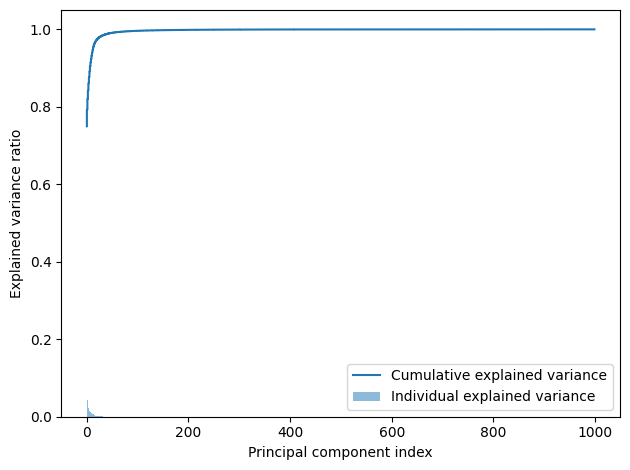

In [5]:
exp_var_pca = get_pca_explained_variance_ratio(synthesis_data)

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues,label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

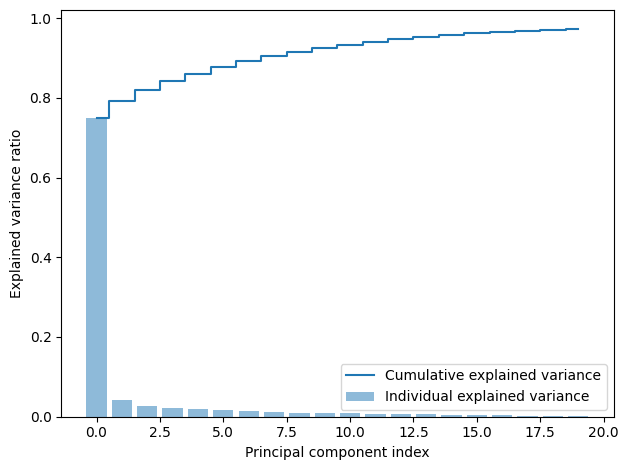

In [6]:
num_components = 20
plt.bar(range(0,num_components), exp_var_pca[:num_components], alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,num_components), cum_sum_eigenvalues[:num_components], where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Из графика видно что 80% дисперсии данных можно выразить используя лишь 2-3 главных компоненты

In [7]:
pca_approximation2 = get_pca_approximation(synthesis_data, 2)

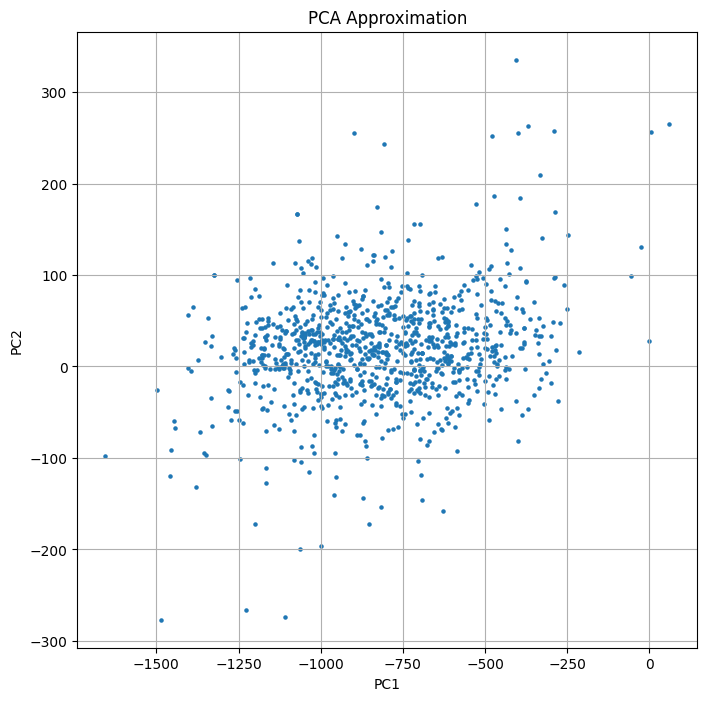

In [8]:
plt.figure(figsize=(8,8))
plt.title("PCA Approximation")
plt.scatter(pca_approximation2[:,0], pca_approximation2[:,1], s=5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True, which="both", axis="both")
plt.show()

In [9]:
pca_approximation3 = get_pca_approximation(synthesis_data, 3)

In [15]:
df = pd.DataFrame(pca_approximation3, columns=["PC1", "PC2", "PC3"])
fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3')
fig.update_traces(marker_size = 2)

fig.show()